In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data = pd.read_csv("E:\\MPR\\banking.csv")

In [3]:
data = data.dropna()
print(data.shape)
print(data.columns)

(41188, 21)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')


Predict variable (desired target):
y - has the client subscribed a term deposit? (binary: '1','0')

The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

In [4]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

 How np.where() works
np.where(condition, value_if_true, value_if_false) evaluates a condition element-wise:

If the condition is True, it returns value_if_true

If False, it keeps the original value (value_if_false)
If an entry in data['education'] is 'basic.9y', change it to 'Basic'; otherwise, keep it as it is.

data['education'] = data['education'].replace(['basic.9y', 'basic.6y', 'basic.4y'], 'Basic')


In [5]:
data['education']=np.where(data['education'] =='basic.9y' ,"Basic",data['education'])
data['education'] = data['education'].replace(['basic.6y', 'basic.4y'],'Basic')

In [6]:
data["education"].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [7]:
data['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In [8]:

data.groupby('y').mean(numeric_only=True)



,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


Observations:

The average age of customers who bought the term deposit is higher than that of the customers who didn't. The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale. Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

In [9]:
data.groupby('job').mean(numeric_only=True)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


Text(0, 0.5, 'Frequency of Purchase')

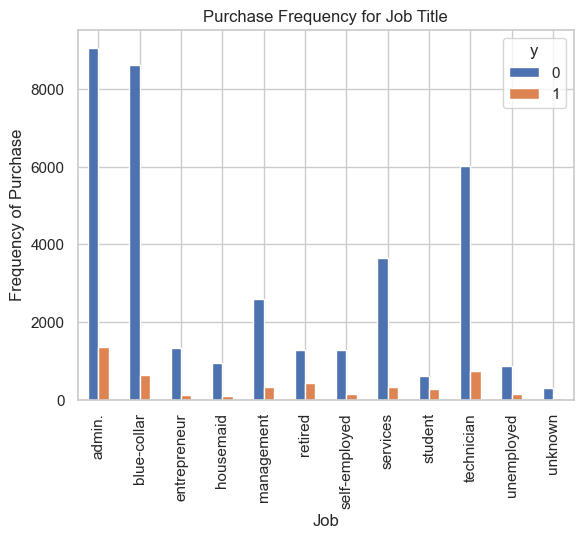

In [10]:
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')


The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

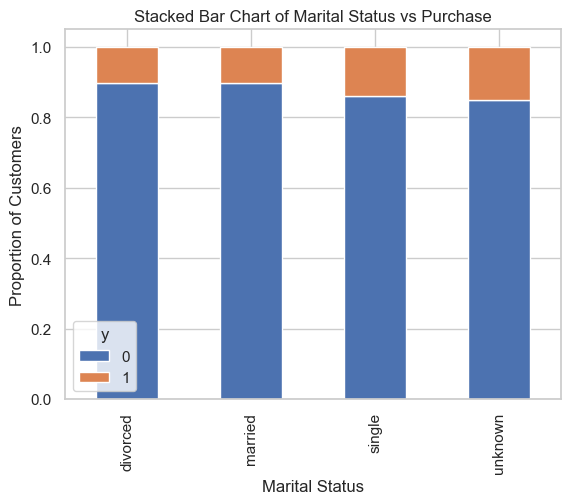

In [11]:
table = pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind = 'bar' , stacked = True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

Hard to see, but the marital status does not seem a strong predictor for the outcome variable.  table.div(..., axis=0)
Divides each row of the table by its row sum.

This normalizes the rows so that each row sums to 1.0 (or 100% if multiplied).

Text(0, 0.5, 'Proportion of Customers')

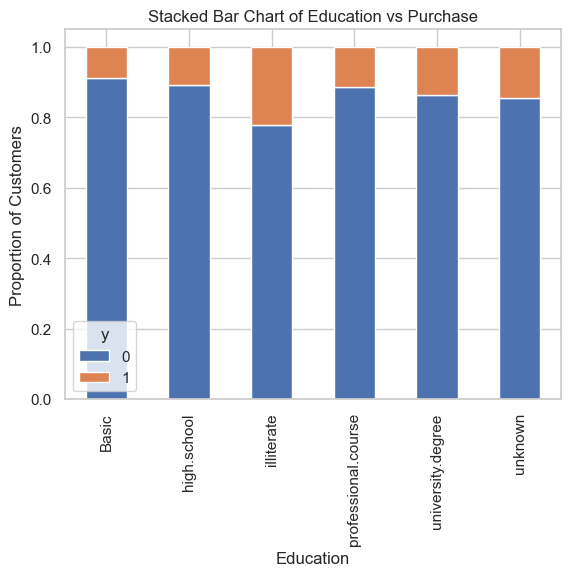

In [12]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')


Education seems a good predictor of the outcome variable.

Text(0, 0.5, 'Frequency of Purchase')

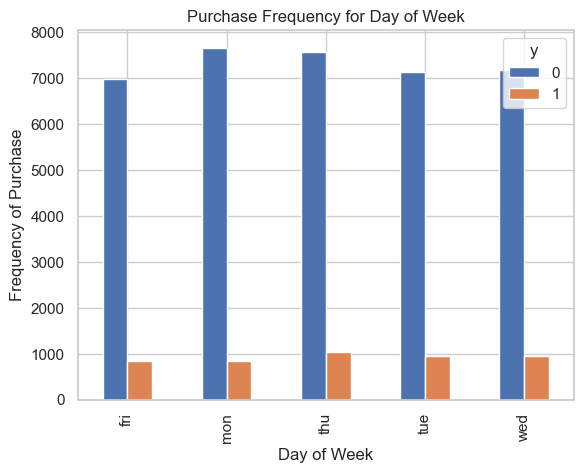

In [13]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')


Day of week may not be a good predictor of the outcome

Text(0, 0.5, 'Frequency of Purchase')

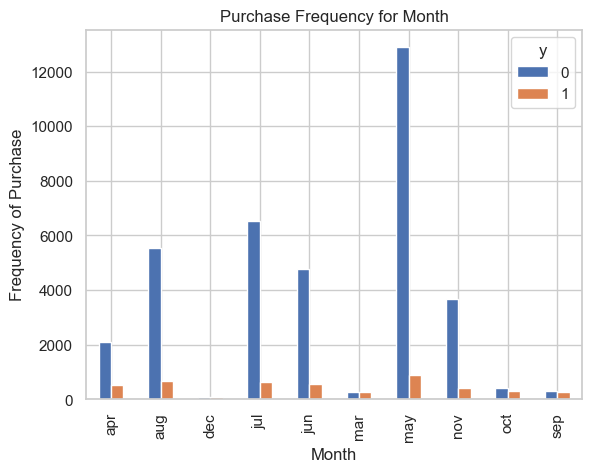

In [14]:

pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')


Month might be a good predictor of the outcome variable

Text(0, 0.5, 'Frequency')

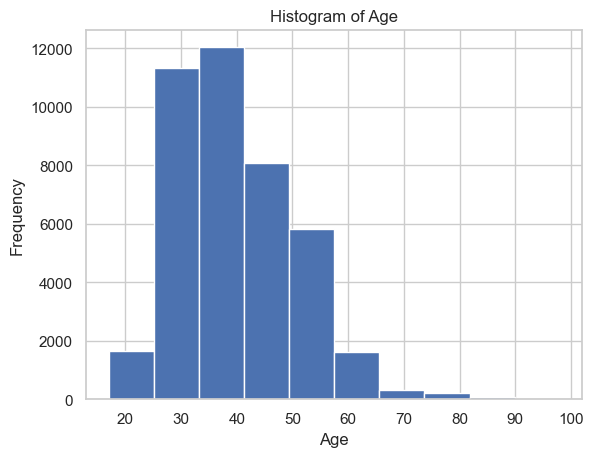

In [15]:

data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')


The most of the customers of the bank in this dataset are in the age range of 30-40.

Text(0, 0.5, 'Frequency of Purchase')

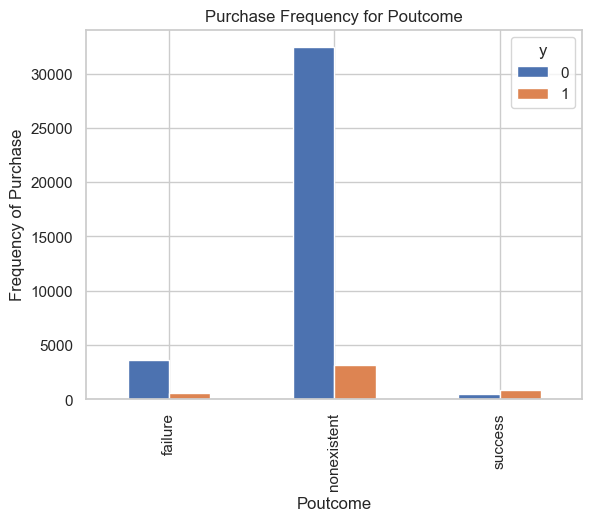

In [16]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')


This code block is performing one-hot encoding (also called dummy variable creation) for a list of categorical variables.Because machine learning models (like logistic regression, decision trees, etc.) cannot handle text labels directly. They need numerical input. One-hot encoding transforms text into numbers while preserving category meaning.

In [17]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list = pd.get_dummies(data[var],prefix=var)
    data1= data.join(cat_list)
    data = data1

In [18]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep= [i for i in data_vars if i not in cat_vars]


In [19]:
data_final = data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

Create a new list to_keep that includes only those column names in data_vars that are not in cat_vars.

In short:
You're separating non-categorical columns (like numeric features) into the list to_keep.

In [20]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

Feature Selection

 What is RFE?
RFE (Recursive Feature Elimination) is a feature selection technique that:

Fits a model (like Logistic Regression).

Ranks features by importance based on the model's coefficients or feature importances.

Eliminates the least important features, one at a time, recursively.

Stops when the desired number of features is selected.

👉 The goal: Reduce dimensionality by selecting only the most relevant features, improving model performance and reducing overfitting.

RFE() is initialized with:

logreg: The estimator used to evaluate feature importance.

18: The number of top features you want to select.

➡️ RFE will recursively remove features until only 18 remain.

print(rfe.support_)
This prints a boolean array.

Each element corresponds to a feature in data_final[X].

True means that feature was selected.

False means that feature was eliminated.

print(rfe.ranking_)
This prints the ranking of all features.

The selected features (top 18) have a ranking of 1.

Higher numbers indicate less important features (removed earlier in the elimination process). 
Then:

'age', 'duration', 'marital' were selected (ranking = 1)

'balance' and 'job' were not selected (ranking = 2, 3)  
 rfe.ranking_: What the Numbers Mean
The rfe.ranking_ output is a list of integers, one per feature (in the same order as your input features data_final[X]).

A ranking of 1 means that the feature was selected by RFE (i.e., one of the top n_features_to_select features).

A ranking > 1 means the feature was not selected — the higher the number, the earlier it was eliminated during the recursive process.

In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# Correct usage with keyword arguments
rfe = RFE(estimator=logreg, n_features_to_select=18)

rfe = rfe.fit(data_final[X], data_final[y])

print(rfe.support_)   # Boolean array indicating selected features
print(rfe.ranking_)   # Feature rankings (1 means selected)


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

[False False False False  True False False False  True False False  True
 False False False  True False  True  True False False False False False
 False False False False False False False False  True False False False
 False False False False False False  True  True  True  True False False
  True  True  True  True False False  True False False False  True False
  True]
[38 33 12 35  1 16 26 21  1 32  6  1 10 37 39  1 40  1  1 25 31 42 36 30
 15 43  4  5 41 11 29  7  1 23 44 34 13 14 27 18 17 19  1  1  1  1  3 20
  1  1  1  1 24 28  1  9  8  2  1 22  1]


In [22]:
data_final[X]

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,False,False,False,False,True,False,False,False,True,False
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,False,False,True,False,False,False,False,False,True,False
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,False,False,False,False,True,False,False,False,False,True
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,False,False,True,False,False,False,False,False,True,False
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1,...,False,False,False,False,True,False,False,False,True,False
41184,31,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0,...,False,False,False,False,True,False,False,False,True,False
41185,42,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,False,False,False,True,False,True,False
41186,48,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5,...,True,False,False,False,False,True,False,False,True,False


In [23]:
# Get the column names from your X (which should be a list of column names or DataFrame)
selected_columns = data_final[X].columns[rfe.support_]

print("Selected columns by RFE:")
print(selected_columns)


Selected columns by RFE:
Index(['previous', 'euribor3m', 'job_blue-collar', 'job_retired',
       'job_services', 'job_student', 'default_no', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'day_of_week_mon', 'poutcome_failure',
       'poutcome_success'],
      dtype='object')


In [24]:
cols = ['previous', 'euribor3m', 'job_blue-collar', 'job_retired',
       'job_services', 'job_student', 'default_no', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'day_of_week_mon', 'poutcome_failure',
       'poutcome_success']
X=data_final[cols]
y=data_final['y']

In [25]:
y

0        0
1        0
2        1
3        0
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: y, Length: 41188, dtype: int64

In [26]:
X

,previous,euribor3m,job_blue-collar,job_retired,job_services,job_student,default_no,contact_telephone,month_apr,month_aug,month_dec,month_mar,month_may,month_nov,month_oct,day_of_week_mon,poutcome_failure,poutcome_success
0,0,4.963,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,0,4.021,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
2,2,0.729,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
3,0,1.405,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False
4,1,0.869,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,4.866,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
41184,0,4.860,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
41185,0,4.857,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
41186,0,0.742,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

Predicting the test set results and caculating the accuracy


Implementing the model

In [28]:
y_pred = logreg.predict(X_test)

In [29]:
logreg.score(X_test,y_test)

0.9017560896657765

In [30]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


cross validation

In [31]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7,shuffle=True)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.898


Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[10867   114]
 [ 1100   276]]


The result is telling us that we have 10872+254 correct predictions and 1122+109 incorrect predictions.

In [33]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)


LogisticRegression()

In [34]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.90


Compute precision, recall, F-measure and support

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10981
           1       0.71      0.20      0.31      1376

    accuracy                           0.90     12357
   macro avg       0.81      0.60      0.63     12357
weighted avg       0.89      0.90      0.88     12357



hat do these terms mean?
Metric	What it tells you
Precision	Of all predictions for this class, how many were actually correct? (less false alarms)
Recall	Of all actual samples in this class, how many did we catch? (less missed ones)
F1-score	A balance between precision and recall
Support	Number of actual samples in that class (how many test labels are class 0 or 1)

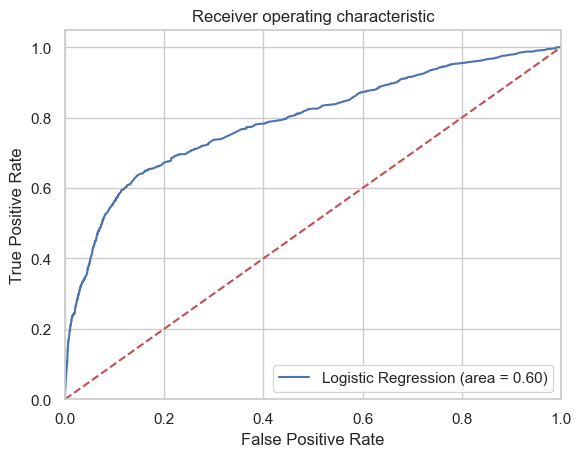

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()